## IMPORT LIBRARIES


In [2]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pomegranate import *

### read the data from csv file, convert to numpy and read selected columns and the label as attribute 14


In [10]:
df1 = pd.read_csv('./Desktop/DataSet/heart.csv') ##read data as pandas

# display (df1.head())

# des = df1.info()
# print (des)
# ##removes nan and incorrect data
d = df1 ['ca'] != 4
df1 = df1[d]
df1 = df1[df1['thal'] != 0]
print(df1.shape)

# ##convert pandas to numpy (array)
df = df1.to_numpy()

# ## Split the data into inputs (X) and output (Y)
X = df[:, :13] 
Y = df[:, -1]   


print ('_'*50)
print ('X = features')
display (X [0:5])
print ('_'*50)
print ('y = target')
display (Y [0:5])


(296, 14)
__________________________________________________
X = features


array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

__________________________________________________
y = target


array([1., 1., 1., 1., 1.])

### Split into training, testing sets with the data. Use 20% as the testing ratio.

In [4]:
##split X and Y into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))

train set:(236, 13)

test set:(60, 13)


### Apply Standardization. fitting only the training data

In [5]:
##standardization process with the standard score

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)  #note this also transforms and fits the model
X_test = sc.transform (X_test)
display (X_train[0])
display (X_test [0])


array([ 0.81598378,  0.6758625 , -0.01602721, -0.18288705, -0.73990468,
        2.52487623, -0.93670306, -0.41721897, -0.66921802, -0.91457718,
        0.95559244, -0.73688146, -0.50535408])

array([-0.39933113,  0.6758625 , -0.96163231,  0.52178796,  0.99521139,
       -0.39605902,  0.96900317,  1.03856121,  1.49428134,  0.52076922,
        0.95559244, -0.73688146,  1.17441441])

### Implement the Naïve bayes classifier with Gaussian assumption of the features. and show the confusion matrix and accuracy

In [6]:
#naive bayes on training data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()  #the model type, initialized with default
gnb.fit(X_train, y_train)  #train the model by fitting to data
y_pred=gnb.predict(X_test)

cm_test1 = confusion_matrix(y_pred, y_test)
print(cm_test1)

accuracy1 = '{}'.format((cm_test1[0][0] + cm_test1[1][1])/len(y_test))
print(accuracy1)

[[25  3]
 [ 7 25]]
0.8333333333333334


### 2b. Output probability of heart disease

In [7]:
print(gnb.predict_proba(X_test)) ##this checks the probability of a heart disease using the test set

print(y_test)
print(y_pred) 
print("Number of mislabeled points out of a total %d points : %d"
      % (y_test.shape[0],(y_test != y_pred).sum()))

[[8.17052814e-01 1.82947186e-01]
 [9.99868971e-01 1.31028856e-04]
 [7.34847770e-03 9.92651522e-01]
 [9.99998174e-01 1.82572686e-06]
 [3.30309200e-01 6.69690800e-01]
 [5.49687150e-03 9.94503128e-01]
 [9.99876209e-01 1.23790851e-04]
 [1.61323843e-02 9.83867616e-01]
 [9.98965937e-01 1.03406347e-03]
 [1.17768957e-02 9.88223104e-01]
 [1.60551650e-02 9.83944835e-01]
 [3.34641171e-03 9.96653588e-01]
 [1.36414661e-03 9.98635853e-01]
 [1.23178649e-01 8.76821351e-01]
 [7.01248028e-03 9.92987520e-01]
 [9.99757949e-01 2.42050827e-04]
 [9.99777722e-01 2.22278338e-04]
 [9.78541471e-01 2.14585290e-02]
 [2.37254641e-03 9.97627454e-01]
 [6.73583425e-02 9.32641657e-01]
 [2.76795125e-04 9.99723205e-01]
 [9.95787061e-01 4.21293920e-03]
 [4.80338657e-04 9.99519661e-01]
 [9.88044610e-01 1.19553898e-02]
 [9.99884354e-01 1.15646195e-04]
 [9.76432314e-01 2.35676864e-02]
 [1.23742385e-03 9.98762576e-01]
 [9.99999998e-01 1.59274740e-09]
 [8.78430046e-02 9.12156995e-01]
 [9.97219368e-01 2.78063161e-03]
 [8.222186

### Look at the class distributions of the model for each feature to know the best predictors of heart disease

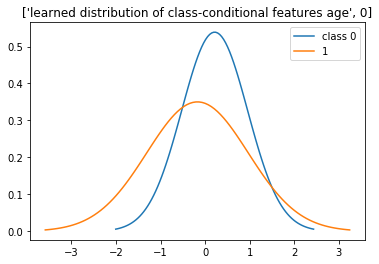

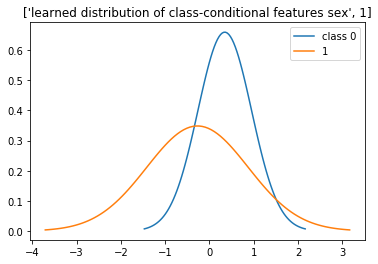

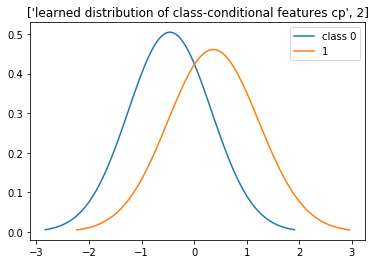

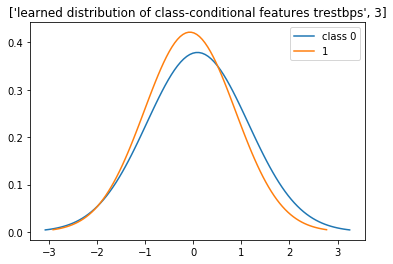

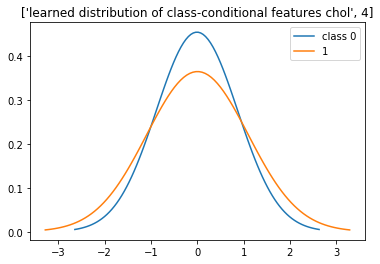

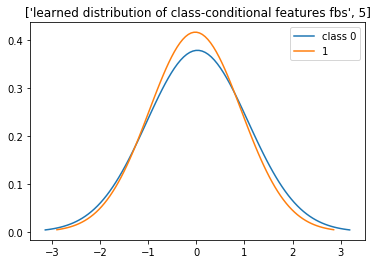

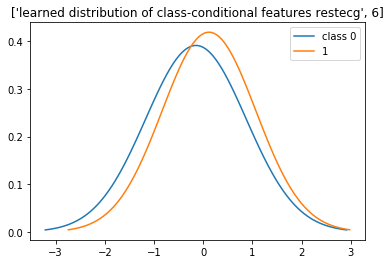

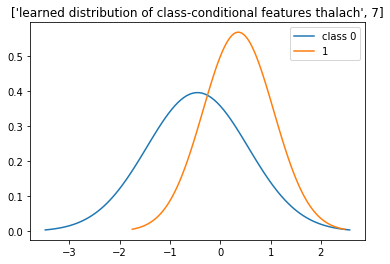

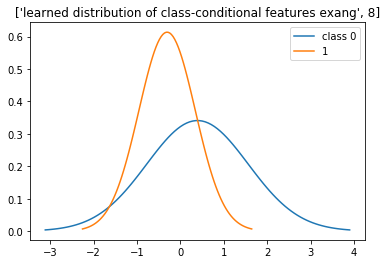

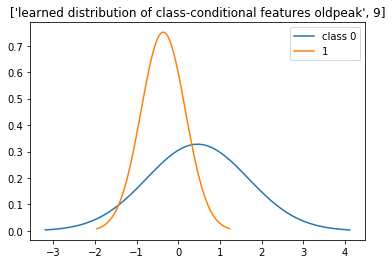

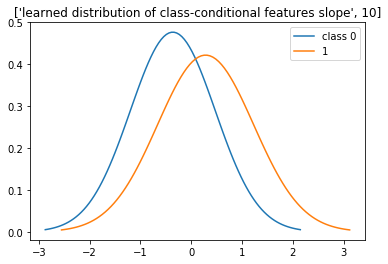

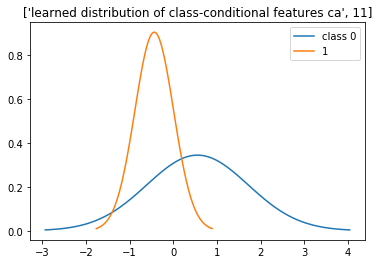

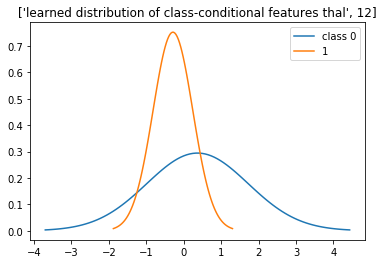

<Figure size 432x288 with 0 Axes>

In [8]:
import scipy.stats as stats
for j in range(0,len(df1.columns[:-1])):
 for i in range(0,len(df1.loc[:,"target"].unique())):
  mu = gnb.theta_[i][j]
  sigma = gnb.sigma_[i][j]
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))

 plt.title(['learned distribution of class-conditional features '+df1.columns[j],j])
 plt.legend(['class 0','1'])
 plt.figure()  
plt.show()



In [9]:
##showing the difference of the mean and variance of each class for every feature as a table

dd=dict()
for j in range(0,len(df1.columns[:-1])):
    for i in range(0,len(df1.loc[:,"target"].unique())):
        if i==0:
            mu0 = gnb.theta_[i][j]
            sigma0 = gnb.sigma_[i][j]
        if i==1:
            mu1 = gnb.theta_[i][j]
            sigma1 = gnb.sigma_[i][j]
    mu_diff=abs(mu1-mu0)
    sigma_diff=abs(sigma1-sigma0)
    dd[df1.columns[j]]=[mu_diff,sigma_diff]
d=pd.DataFrame(dd)
d.index=["mu_diff","sigma_diff"]

display(d)
print(len(d.index))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
mu_diff,0.385758,0.615485,0.825200,0.158596,0.010728,0.045108,0.265977,0.811916,0.700364,0.821576,0.645375,0.989342,0.655854
sigma_diff,0.398703,0.539628,0.074923,0.107079,0.216319,0.095785,0.067671,0.305815,0.519648,0.686717,0.108659,0.718789,0.825156


2


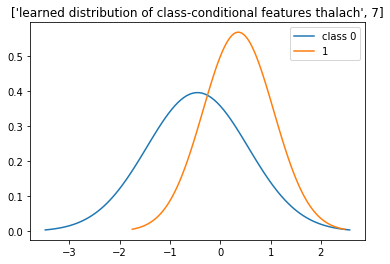

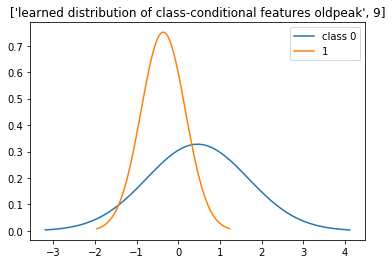

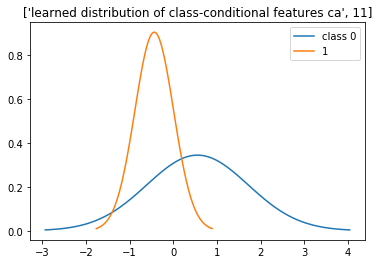

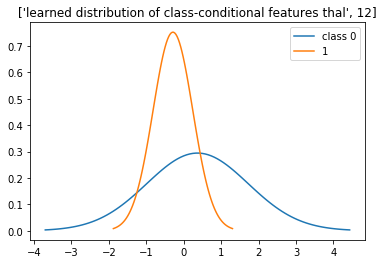

<Figure size 432x288 with 0 Axes>

In [10]:
##features with the highest difference in mu and sigma, narrowing down to 4

import scipy.stats as stats
#first column of theta and sigma corresponds to the feature 0.
#So change the rows in the loop to plot class conditional per feature.
##for j in range(0,len(df.columns[:-1])):
for j in [7,9,11,12]:
 for i in range(0,len(df1.loc[:,"target"].unique())):
  mu = gnb.theta_[i][j]
  #print(mu)
  sigma = gnb.sigma_[i][j]
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))

 plt.title(['learned distribution of class-conditional features '+df1.columns[j],j])
 plt.legend(['class 0','1','2'])
 plt.figure() 
plt.show()

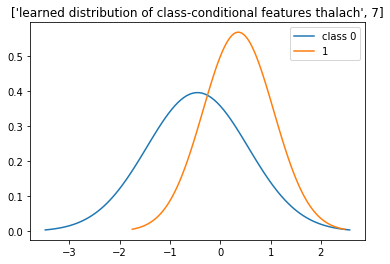

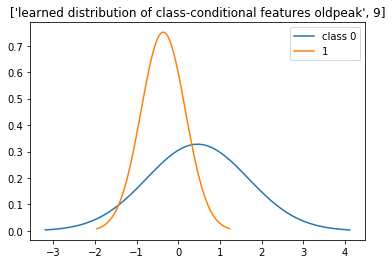

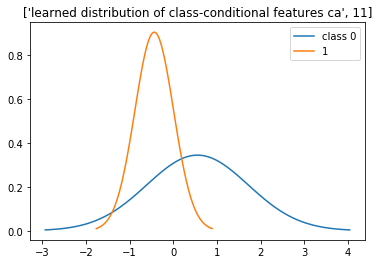

<Figure size 432x288 with 0 Axes>

In [11]:
## the three most seperable

import scipy.stats as stats
#first column of theta and sigma corresponds to the feature 0.
#So change the rows in the loop to plot class conditional per feature.
##for j in range(0,len(df.columns[:-1])):
for j in [7,9,11]:
 for i in range(0,len(df1.loc[:,"target"].unique())):
  mu = gnb.theta_[i][j]
  #print(mu)
  sigma = gnb.sigma_[i][j]
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))

 plt.title(['learned distribution of class-conditional features '+df1.columns[j],j])
 plt.legend(['class 0','1','2'])
 plt.figure() 
plt.show()

### Use three features of my choice to implement a new Naïve bayes classifier

In [11]:
##creating a new data set using the three features i believe are the most seperable
df2 = df1.iloc [:,[7,9,11, -1]] 
display (df2.head())

df2 = df2.to_numpy() ##convert to numpy

## Split the data into inputs (X) and output (Y)
X = df2[:, 0:-1]
Y = df2[:, -1]   

##split X and Y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))

##standardization process
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)  #note this also transforms and fits the model
X_test = sc.transform (X_test)

##naive bayes on training data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()  #the model type, initialized with default
gnb.fit(X_train, y_train)  #train the model by fitting to dataand
y_pred=gnb.predict(X_test)

##confusion matrix and accuracy checking
cm_test2 = confusion_matrix(y_pred, y_test)
print('The confusion matrix is: \n',cm_test2)
accuracy2 = '{}'.format((cm_test2[0][0] + cm_test2[1][1])/len(y_test))
print('The accuracy is: \n',accuracy2)

,thalach,oldpeak,ca,target
0,150,2.3,0,1
1,187,3.5,0,1
2,172,1.4,0,1
3,178,0.8,0,1
4,163,0.6,0,1


train set:(236, 3)

test set:(60, 3)
The confusion matrix is: 
 [[22  3]
 [10 25]]
The accuracy is: 
 0.7833333333333333


###  Implement a Naïve bayes using 4 attributes ('trestbps', 'chol', 'fbs', 'restecg').

In [12]:

##creating a new data set using the four features given
df2 = df1.iloc [:,[3,4,5,6,-1]]
display (df2.head())


##convert to numpy
df2 = df2.to_numpy()


## Split the data into inputs (X) and output (Y)
X = df2[:, 0:-1] 
Y = df2[:, -1] 


##split X and Y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))


## Standardization Process
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)#note this also transforms and fits the model
X_test= sc.transform (X_test)


#Naive bayes on training data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()  #the model type, initialized with default
gnb.fit(X_train, y_train)  #train the model by fitting to dataand
y_pred=gnb.predict(X_test)

cm_test3 = confusion_matrix(y_pred, y_test)
print(cm_test3)

accuracy3 = '{}'.format((cm_test3[0][0] + cm_test3[1][1])/len(y_test))
print(accuracy3)

,trestbps,chol,fbs,restecg,target
0,145,233,1,0,1
1,130,250,0,1,1
2,130,204,0,0,1
3,120,236,0,1,1
4,120,354,0,1,1


train set:(236, 4)

test set:(60, 4)
[[10  6]
 [22 22]]
0.5333333333333333


features 7, 9, 11 and 12 are the most accurate predictor of a heart disease
features 0, 1, 2, 3, 4, 5, 6, 8, 10 are the worst predictors of a heart disease 

REASONS:
1) Features 7, 9, 11 and 12 were the most seperable when plotting the mean and variance
2) The confusion matrix which gave the accuracy was higher using features 7,9,11 at 53% and the accuracy using 3,4,5,6&7 was 27%.


### Output the confusion matrix of classifier for full (all 13 attributes), selected 3, and attributes'trestbps', 'chol', 'fbs' & 'restecg'.

In [14]:
print ('The confusion matrix for all 13 attributes:\n', cm_test1)
print ('The confusion matrix for my selected 3 (feature 7,9,11):\n',cm_test2)
print ('The confusion matrix for 3.c (trestbps, chol, fbs, restecg):\n',cm_test3)

The confusion matrix for all 13 attributes:
 [[25  3]
 [ 7 25]]
The confusion matrix for my selected 3 (feature 7,9,11):
 [[22  3]
 [10 25]]
The confusion matrix for 3.c (trestbps, chol, fbs, restecg):
 [[10  6]
 [22 22]]


###  Classification accuracy of the algorithm on test dataset with full attributes, selected 3, and  attributes 'trestbps', 'chol', 'fbs' & 'restecg'

In [15]:
print ('The accuracy for all 13 attributes:\n',accuracy1)
print ()
print ('The accuracy for my selected 3 (feature 7,9,11):\n',accuracy2)
print ()
print ('The accuracy for 3.c (trestbps, chol, fbs, restecg):\n',accuracy3)
print()
print ('The accuracy decreases because the selected data used is missing a vital data in the prediction of heart disease')

The accuracy for all 13 attributes:
 0.8333333333333334

The accuracy for my selected 3 (feature 7,9,11):
 0.7833333333333333

The accuracy for 3.c (trestbps, chol, fbs, restecg):
 0.5333333333333333

The accuracy decreases because the selected data used is missing a vital data in the prediction of heart disease


### Output probabilities of a patient with the following 13 attributes: X_patient =[57,0,1,130,236,0,0,174,0,0,1,1,2]

In [16]:

## Call back original data and convert to numpy
df5 = df1
df5 = df5.to_numpy()


## Split the data into inputs (X) and output (Y)
X = df5[:, 0:-1] 
Y = df5[:, -1]   


##split X and Y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))


## Standardization process
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)


X_patient = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2]).reshape(1,-1)

#Naive Bayes on your training data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()  #the model type, initialized with default
gnb.fit(X_train, y_train)  

##check the data(features to check for a match and return true)

##find X_patient in the data set (pandas)
maskLoc=(df1.iloc[:,:-1]== X_patient) 

##return true in the data frame where all columns are all true
maskLoc=maskLoc.all(axis='columns').to_numpy()

##display the boolean vector
display(maskLoc[260:320])

## get all the column names
cols=df1.iloc[:,:-1].columns 


X_patient=df1.loc[maskLoc,cols]

X_patient_norm= (X_patient - sc.mean_)/np.sqrt(sc.var_) ##normalize

display(X_patient_norm)
display(gnb.predict_proba(X_patient))
display(gnb.predict(X_patient))
# display(y_pred)


train set:(236, 13)

test set:(60, 13)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
302,0.263568,-1.479591,-0.016027,-0.065441,-0.206023,-0.396059,-0.936703,1.082676,-0.669218,-0.914577,-0.655263,0.3366,-0.505354


array([[1.00000000e+000, 1.12536645e-127]])

array([0.])

### Suppose the ST depression induced by exercise readings kept increasing at a rate of 0.1 between [0 – 4]. the probability of heart disease at each reading with this patient and plot.


[1.0, 1.0, 1.0, 1.0, 1.0]

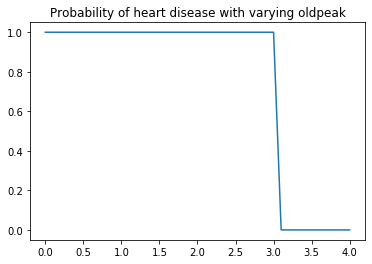

<Figure size 432x288 with 0 Axes>

In [17]:
sim_oldpeak=np.linspace(0,4,41)
heart_disease = []
X_patient = np.array([57,0,1,130,236,0,0,174,0,sim_oldpeak,1,1,2]).reshape(1,-1)
for s_o in sim_oldpeak:
    X_patient_so = np.array([57,0,1,130,236,0,0,174,0,s_o,1,1,2]).reshape(1,-1)
    
    X_patient_test_so = sc.transform(X_patient_so)
    
    predict_x_patient = gnb.predict(X_patient_test_so)
    
    heart_disease.append(predict_x_patient[0])

display (heart_disease [0:5])

plt.plot(sim_oldpeak, heart_disease)

plt.title('Probability of heart disease with varying oldpeak')
plt.figure() 
plt.show()
    

    
    
    

###  If we are given a heart disease patient with age = 40. Is it possible to infer the probability of male from the model? Why or why not? If so, what is the probability of male and how would it be formulated as an input in the model?


In [18]:
X = df[:, [0,-1] ]## features are age and heart disease
Y = df[:, 1]   ##target is sex

# display(df[:,[0,1,-1]])
print ('_'*50)
print ('X = features')
display (X [0:10])
print ('_'*50)
print ('y = target')
display (Y [0:10])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
##split X and Y into train and test set


print ( 'train set:' +str (X_train.shape) +'\n' '\n'+  'test set:' +str(X_test.shape))

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)  #note this also transforms and fits the model
X_test = sc.transform (X_test)

#bayesian network on your training data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()  #the model type, initialized with default
gnb.fit(X_train, y_train)  #train the model by fitting to dataand
y_pred=gnb.predict_proba(X_test)
print (y_pred)



__________________________________________________
X = features


array([[63.,  1.],
       [37.,  1.],
       [41.,  1.],
       [56.,  1.],
       [57.,  1.],
       [57.,  1.],
       [56.,  1.],
       [44.,  1.],
       [52.,  1.],
       [57.,  1.]])

__________________________________________________
y = target


array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1.])

train set:(236, 2)

test set:(60, 2)
[[0.10595775 0.89404225]
 [0.14860177 0.85139823]
 [0.41948082 0.58051918]
 [0.14395179 0.85604821]
 [0.09747154 0.90252846]
 [0.43494891 0.56505109]
 [0.12130138 0.87869862]
 [0.41496185 0.58503815]
 [0.15353657 0.84646343]
 [0.47460247 0.52539753]
 [0.12130138 0.87869862]
 [0.42431707 0.57568293]
 [0.40001634 0.59998366]
 [0.12793228 0.87206772]
 [0.39439162 0.60560838]
 [0.18301292 0.81698708]
 [0.11284205 0.88715795]
 [0.09889694 0.90110306]
 [0.40328752 0.59671248]
 [0.39705173 0.60294827]
 [0.40001634 0.59998366]
 [0.11547595 0.88452405]
 [0.38415699 0.61584301]
 [0.09393791 0.90606209]
 [0.09747154 0.90252846]
 [0.17019841 0.82980159]
 [0.49040297 0.50959703]
 [0.10595775 0.89404225]
 [0.12130138 0.87869862]
 [0.10045317 0.89954683]
 [0.43494891 0.56505109]
 [0.13545146 0.86454854]
 [0.40686737 0.59313263]
 [0.3920341  0.6079659 ]
 [0.52575196 0.47424804]
 [0.13157527 0.86842473]
 [0.46718355 0.53281645]
 [0.44074771 0.55925229]
 [0.39439162 

# BAYESIAN NETWORK

### Convert the attributes to a discrete variable using binning approach.  k=5 bins.

In [13]:
#read the data file, and convert the mappings (i.e. classes)- we can start with binary. 
df1 = pd.read_csv('./Desktop/DataSet/heart.csv')  # , header = None)


##removes nan and incorrect data
d = df1['ca'] != 4
df1 = df1[d]
print(df.shape)
#remove samples where thal = 0. (NaN in original data)
d2 = df1.loc[:,'thal'] !=0
df1 = df1.loc[d2,:]
print(df1.shape)


df = df1.to_numpy() 

X = df[:, :]  
Y = df[:, -1]


#selecting number of bins

from sklearn import preprocessing
est = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform').fit(X)  # n_bins=10 #[3, 2, 2]
X_binned = est.transform(X)

print('after binning',X_binned[1])
print(X_binned.shape)
X_binned[:,[1,2,5,6,8,10,11,12,13]]=X[:,[1,2,5,6,8,10,11,12,13]] #replace with original label thats not encoded.
print('after replacement ', X_binned[1])



(296, 14)
(296, 14)
after binning [0. 4. 3. 1. 1. 0. 2. 4. 0. 2. 0. 0. 2. 4.]
(296, 14)
after replacement  [0. 1. 2. 1. 1. 0. 1. 4. 0. 2. 0. 0. 2. 1.]


###  Run code using exact search on Bayes net to get the structure of nodes.

In [20]:
X = X_binned

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
##display (X_train)

model = BayesianNetwork.from_samples(X_train, algorithm ='exact')

print(model.structure)

print("finished training Bayes net")

num_samples = np.size(X_test,0)
#N=X_TEST.SHAPE[0]
B = [None] * num_samples

B = np.array(B).reshape(num_samples,1)


X_test_2 = np.hstack((X_test[:,:-1],B))
print('x_test_2')
print(X_test_2[1])
predictions = model.predict(X_test_2)
print (predictions[0:5])

predictions = np.array(predictions) # converts list of arrays into a 2D array.
print('the last column..')
print(predictions.shape)
print(predictions[1:10,-1])
##now our y is simply the last column.
y_pred = predictions[:,-1]
y_pred = y_pred.astype(int)
print(y_pred)
print ()
print(y_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (y_test.shape[0],(y_test != y_pred).sum()))

((), (12,), (8,), (), (), (), (), (13,), (), (10,), (13,), (13,), (13,), (2,))
finished training Bayes net
x_test_2
[3.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 2.0 None]
[array([2.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 2.0, 0.0, 3.0,
       1.0], dtype=object), array([3.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 2.0,
       0.0], dtype=object), array([2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0, 2.0, 0.0, 2.0,
       1.0], dtype=object), array([3.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 1.0, 3.0, 3.0,
       0.0], dtype=object), array([1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 3.0,
       0.0], dtype=object)]
the last column..
(60, 14)
[0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0]
[1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0]

[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1

### Classification accuracy of the algorithm with full attributes

In [21]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test,y_pred)

print('The confusion matrix is: \n',cm_test)
accuracy6 = '{}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test))
print('The classification accuracy of the algorithm with full attributes is: \n', accuracy6)

The confusion matrix is: 
 [[26  6]
 [ 2 26]]
The classification accuracy of the algorithm with full attributes is: 
 0.8666666666666667


### Heart disease probabilities of a patient with the following 13 attributes: X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2]
               

In [22]:


X_test_3 = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2, 0]).reshape(1,-1)   

X_binned_3 = est.transform(X_test_3)

X_binned_3[:,[1,2,5,6,8,10,11,12,13]]=X_test_3[:,[1,2,5,6,8,10,11,12,13]]  #replace the category again

X_binned_3[:,13]=None  ##infering attribute 13 (heart disease)

predictions_t = model.predict_proba(X_binned_3) 

print('predicted model', predictions_t)



predicted model [array([2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 1.0, 2.0,
       {
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0.0" :0.16170810889440446,
            "1.0" :0.8382918911055954
        }
    ],
    "frozen" :false
}], dtype=object)]


### Probability of heart disease given [Age = 40, male, asymptomatic chest pain].

In [27]:

X_test_cp = np.array([40,1,0,130,236,0,0,174,0,0,1,1,2, 0]).reshape(1,-1)   

X_binned_cp = est.transform(X_test_cp)

X_binned_cp[:,[1,2,5,6,8,10,11,12,13]]=X_test_cp[:,[1,2,5,6,8,10,11,12,13]]  #replace the category again

X_binned_cp[:,3:14]=None  ##infering attribute 13 (heart disease)

display (X_binned_cp)



predictions_t = model.predict_proba(X_binned_cp) 

count=3
for colName in df1.columns[3:14]:
    arr=predictions_t[0]
    each_pred=arr[count]
    print('predicted result for ' + colName +': ' + str(each_pred)+'\n')
    count=count+1





array([[ 1.,  1.,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan]])

predicted result for trestbps: {
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1.0" :0.46186440677966073,
            "2.0" :0.28389830508474573,
            "4.0" :0.012711864406779868,
            "0.0" :0.1822033898305085,
            "3.0" :0.05932203389830523
        }
    ],
    "frozen" :false
}

predicted result for chol: {
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0.0" :0.2796610169491524,
            "1.0" :0.5805084745762707,
            "2.0" :0.12288135593220349,
            "3.0" :0.012711864406779868,
            "4.0" :0.004237288135593436
        }
    ],
    "frozen" :false
}

predicted result for fbs: {
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1.0" :0.13559322033898322,
            "0.0"

### Heart disease patient with age = 40, probability of male from the model?

In [38]:


X_test_4 = np.array([[40,1,4,130,236,0,0,174,0,0,1,1,2,1]]).reshape(1,-1)   


X_binned_4 = est.transform(X_test_4)

X_binned_4[:,[1,2,5,6,8,10,11,12,13]]=X_test_4[:,[1,2,5,6,8,10,11,12,13]] #replace the category again

# print('actual bin', X_binned_4[:,13]) #lets infer attribute 1

X_binned_4[:,1:12]=None 

predictions_t = model.predict_proba(X_binned_4) 

print('predicted result', predictions_t)






predicted result [array([1.0,
       {
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0.0" :0.4732824427480916,
            "1.0" :0.5267175572519084
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0.0" :0.24242424242424235,
            "1.0" :0.23484848484848486,
            "2.0" :0.4015151515151513,
            "3.0" :0.12121212121212147
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "1.0" :0.46186440677966073,
            "2.0" :0.28389830508474573,
            "4.0" :0.012711864406779868,
            "0.0" :0.1822033898305085,
            "3.0" :0.05932203389830523
        }
    ],
    "frozen" :false
},
       {
    "